In [1]:
import pandas as pd
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import numpy as np
import matplotlib as mpl
import mysql.connector
import random 

In [2]:
host = 'localhost'
db = 'netflix'
user = 'erwan'
mdp = 'root'
port = 3306

### MCD de la base de données 

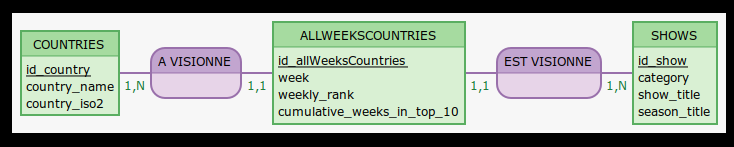

## Import du csv des coordonnées GPS

In [3]:
# import du csv
gps = pd.read_csv('gps.csv')

# mettre les series en np.arrays pour simplifier le traitement et la recherche par index
pays = np.array(gps['Pays'])
lat = np.array(gps['Lat'])
lon = np.array(gps['lon'])

## Test avec un nom de film

In [9]:
#récupérer le nombre total de films
conn = mysql.connector.connect(host=host, user=user, password=mdp, database=db, port=3306)
cursor = conn.cursor()
cursor.execute('SELECT COUNT(*) FROM shows')
nbr_films = cursor.fetchone()[0]
cursor.close()
conn.close()

In [10]:
# trouver un film au hasard
rd1 = random.randint(0, int(nbr_films)) 

conn = mysql.connector.connect(host=host, user=user, password=mdp, database=db, port=3306)
cursor = conn.cursor()
cursor.execute(f'SELECT show_title FROM shows WHERE id_show={rd1}')
film = cursor.fetchone()[0]
cursor.close()
conn.close()

film

'The Tinder Swindler'

In [11]:
# appel de la procédure stockée pour récuperer la liste des pays selon un nom de film
sql = f'CALL getCountriesByMovie("{film}");'

#connexion et requête
conn = mysql.connector.connect(host=host, user=user, password=mdp, database=db, port=3306)
cursor = conn.cursor()
cursor.execute(sql)
res = cursor.fetchall()
cursor.close()
conn.close()

### Traitement de la requête

In [12]:
# mettre les noms de pays dans une liste
liste_pays = []
for i in res:
    liste_pays.append(i[0])

## Tracé de la carte

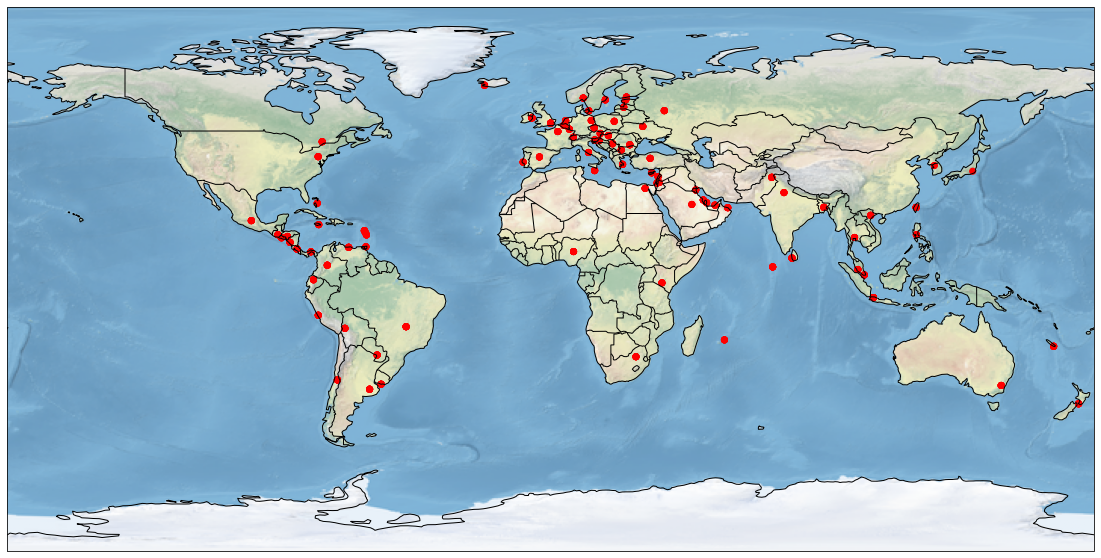

In [13]:
# initialisation de la carte
ax = plt.axes(projection = ccrs.PlateCarree())

# tracé des points en fonction des résultats de la requête
for i in range(len(liste_pays)):
    try:
        ind = np.where(pays == liste_pays[i])[0][0]
        ax.add_artist(plt.Circle((lon[ind],lat[ind]),1, color='red'))
    except:
        continue

# make up        
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)
ax.stock_img()
# taille
plt.gcf().set_size_inches(20, 10)